目標是預測 SalePrice

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 80, dtype: object

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64


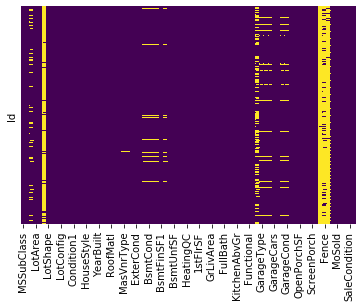

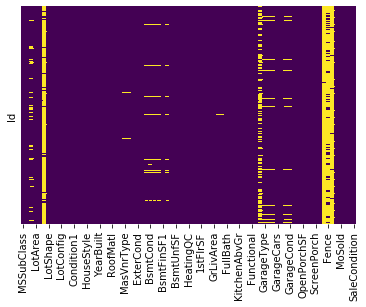

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns


print('目標是預測 SalePrice')
print()
train=pd.read_csv(r'HP_train.csv',index_col=0)
test=pd.read_csv(r'HP_test.csv',index_col=0)
# train.to_html('HP_train.html')
# test.to_html('HP_test.html')

'''了解欄位型態'''
print(train.dtypes)
print()

'''查看是否有遺失值'''
print(train.isnull().sum())

'''用熱力圖凸顯有遺失值欄位'''
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

In [24]:
train.shape

(1460, 80)

In [25]:
# test 沒有 SalePrice，所以只有 79 個 column
test.shape

(1459, 79)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CCC3A4FF88>,
      dtype=object)

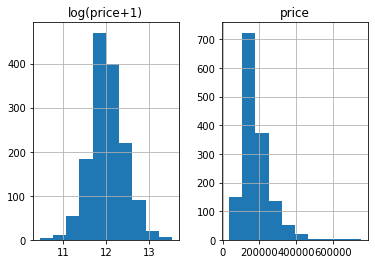

In [26]:
# 因為要做迴歸，所以用 log 把數據給平滑化，+1 是避免值為 0; 最後記得把數據再轉回來即可。
prices=pd.DataFrame({'price':train['SalePrice'],'log(price+1)':np.log1p(train['SalePrice'])})
prices.hist()

In [27]:
# pop() 方法可以将所选列从原数据块中弹出，原数据块不再保留该列
y_train=np.log1p(train.pop('SalePrice'))

In [28]:
# 再把測試集跟訓練集合併，準備做預處理
all=pd.concat((train,test),axis=0)

In [29]:
all.shape

(2919, 79)

In [30]:
y_train

Id
1       12.247699
2       12.109016
3       12.317171
4       11.849405
5       12.429220
          ...    
1456    12.072547
1457    12.254868
1458    12.493133
1459    11.864469
1460    11.901590
Name: SalePrice, Length: 1460, dtype: float64

In [31]:
# 把 MSSubClass 的代號轉換成可識別數值，其中 MSSubClass 是房屋類別 (Category)
all['MSSubClass'].dtypes

dtype('int64')

In [32]:
# 先將它轉成 str
all.MSSubClass=all.MSSubClass.astype(str)

# 看看它的類別數量
all.MSSubClass.value_counts()

20     1079
60      575
50      287
120     182
30      139
160     128
70      128
80      118
90      109
190      61
85       48
75       23
45       18
180      17
40        6
150       1
Name: MSSubClass, dtype: int64

In [33]:
# 用熱讀編碼轉成電腦可以辨識的數值
pd.get_dummies(all.MSSubClass,prefix='MSSubClass').head()

,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90
Id,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [34]:
# 同理，把所以的文字資料都熱編碼; 從結果可以看到從原本的 79 行，擴增成 303 行!
all_dummy=pd.get_dummies(all)
all_dummy.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,...,0,0,0,1,0,0,0,0,1,0
2,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,284.0,...,0,0,0,1,0,0,0,0,1,0
3,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,434.0,...,0,0,0,1,0,0,0,0,1,0
4,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,540.0,...,0,0,0,1,1,0,0,0,0,0
5,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,490.0,...,0,0,0,1,0,0,0,0,1,0


In [35]:
# 將遺失值列出
all_dummy.isnull().sum().sort_values(ascending=False).head(10)

LotFrontage     486
GarageYrBlt     159
MasVnrArea       23
BsmtHalfBath      2
BsmtFullBath      2
BsmtFinSF2        1
GarageCars        1
TotalBsmtSF       1
BsmtUnfSF         1
GarageArea        1
dtype: int64

In [36]:
# 用平均值去填滿遺失值
mean_cols=all_dummy.mean()
mean_cols.head(10)

LotFrontage        69.305795
LotArea         10168.114080
OverallQual         6.089072
OverallCond         5.564577
YearBuilt        1971.312778
YearRemodAdd     1984.264474
MasVnrArea        102.201312
BsmtFinSF1        441.423235
BsmtFinSF2         49.582248
BsmtUnfSF         560.772104
dtype: float64

In [37]:
# 填充
all_dummy=all_dummy.fillna(mean_cols)

# 檢查遺失值總數
all_dummy.isnull().sum().sum()

0

In [38]:
# 把失衡數據標準化
all_cols=all.columns[all.dtypes!=object]
all_dummy[all_cols]

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
Id,,,,,,,,,,,,,,,,,,,,,
1,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,...,548.0,0,61,0,0,0,0,0,2,2008
2,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,284.0,...,460.0,298,0,0,0,0,0,0,5,2007
3,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,434.0,...,608.0,0,42,0,0,0,0,0,9,2008
4,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,540.0,...,642.0,0,35,272,0,0,0,0,2,2006
5,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,490.0,...,836.0,192,84,0,0,0,0,0,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,21.0,1936,4,7,1970,1970,0.0,0.0,0.0,546.0,...,0.0,0,0,0,0,0,0,0,6,2006
2916,21.0,1894,4,5,1970,1970,0.0,252.0,0.0,294.0,...,286.0,0,24,0,0,0,0,0,4,2006
2917,160.0,20000,5,7,1960,1996,0.0,1224.0,0.0,0.0,...,576.0,474,0,0,0,0,0,0,9,2006


In [39]:
# 標準化模組
import sklearn.preprocessing as sp
Fs=sp.StandardScaler().fit(all_dummy[all_cols])
all_dummy.loc[:,all_cols]=Fs.transform(all_dummy[all_cols])
all_dummy[all_cols]

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
Id,,,,,,,,,,,,,,,,,,,,,
1,-0.202068,-0.217879,0.646183,-0.507284,1.046258,0.896833,0.525202,0.580907,-0.29313,-0.934863,...,0.348900,-0.740760,0.200006,-0.359601,-0.103331,-0.285935,-0.06315,-0.089592,-1.552184,0.157646
2,0.501870,-0.072044,-0.063185,2.188279,0.154764,-0.395604,-0.572250,1.178112,-0.29313,-0.629896,...,-0.059792,1.614879,-0.702843,-0.359601,-0.103331,-0.285935,-0.06315,-0.089592,-0.446925,-0.602962
3,-0.061280,0.137197,0.646183,-0.507284,0.980221,0.848965,0.334828,0.097873,-0.29313,-0.288516,...,0.627553,-0.740760,-0.081209,-0.359601,-0.103331,-0.285935,-0.06315,-0.089592,1.026753,0.157646
4,-0.436714,-0.078385,0.646183,-0.507284,-1.859351,-0.682812,-0.572250,-0.494941,-0.29313,-0.047275,...,0.785457,-0.740760,-0.184815,3.874967,-0.103331,-0.285935,-0.06315,-0.089592,-1.552184,-1.363569
5,0.689587,0.518903,1.355551,-0.507284,0.947203,0.753229,1.387486,0.468931,-0.29313,-0.161068,...,1.686437,0.776967,0.540424,-0.359601,-0.103331,-0.285935,-0.06315,-0.089592,2.132012,0.157646
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,-2.266952,-1.043937,-1.481920,1.289758,-0.043346,-0.682812,-0.572250,-0.969192,-0.29313,-0.033619,...,-2.196138,-0.740760,-0.702843,-0.359601,-0.103331,-0.285935,-0.06315,-0.089592,-0.078505,-1.363569
2916,-2.266952,-1.049263,-1.481920,-0.507284,-0.043346,-0.682812,-0.572250,-0.415899,-0.29313,-0.607138,...,-0.867888,-0.740760,-0.347624,-0.359601,-0.103331,-0.285935,-0.06315,-0.089592,-0.815344,-1.363569
2917,4.256207,1.246808,-0.772552,1.289758,-0.373528,0.561757,-0.572250,1.718232,-0.29313,-1.276243,...,0.478938,3.006130,-0.702843,-0.359601,-0.103331,-0.285935,-0.06315,-0.089592,1.026753,-1.363569


In [40]:
# 把處理好的 train、test 先分開
trian1=all_dummy.loc[train.index]
test1=all_dummy.loc[test.index]

# 為了方便，先轉成 array
train2=trian1.values
test2=test1.values

#### 使用 Ridge 模型

In [51]:
# 使用 Ridge 迴歸
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

### 用 Sklearn 中的 cross validation (交叉驗證) 來測試模型參數

In [52]:
# 用 logspace 產生待測試參數
al=np.logspace(-3,2,50)
# print(al)

# 測試結果的存放位置
test_scores=[]

for a in al:
    clf=Ridge(a)
    test_score=np.sqrt(-cross_val_score(clf,train2,y_train,cv=10,scoring='neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))
test_scores=np.array(test_scores)
best=al[np.argmin(test_scores)]
print('最佳參數:',best)

最佳參數: 19.306977288832496


Text(0.5, 1.0, 'alpha vs CV error')

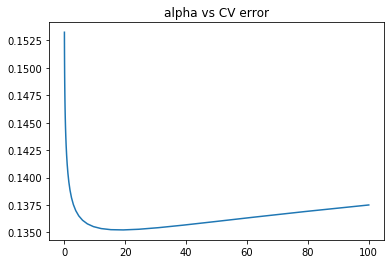

In [50]:
plt.plot(al,test_scores)
plt.title('alpha vs CV error')

當 alpha=10~20 ，錯誤率可以降到 0.135

#### 隨機森林調參

In [54]:
# 隨機特徵
max_feature=[.1,.3,.5,.7,.9,.99]

test_scores=[]

for max_feat in max_feature:
    clf=RandomForestRegressor(n_estimators=200,max_features=max_feat)
    test_score=np.sqrt(-cross_val_score(clf,train2,y_train,cv=5,scoring='neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))
test_scores=np.array(test_scores)
best=max_feature[np.argmin(test_scores)]
print('最佳參數:',best)

最佳參數: 0.3


Text(0.5, 1.0, 'Max_feature vs CV error')

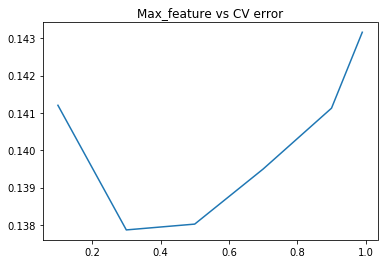

In [55]:
plt.plot(max_feature,test_scores)
plt.title('Max_feature vs CV error')

由測試結果發現，隨機特徵的能見度 : 30% 時，隨機森林的效果最好!

#### 把最好參數當特徵做出幾個模型

### 再用整合器 stacking 的想法，把多個模型的結果當特徵，做出最終的預測模型

In [29]:
ridge=Ridge(alpha=15)
rf=RandomForestRegressor(n_estimators=500,max_features=0.3)

In [30]:
ridge.fit(train2,y_train)
rf.fit(train2,y_train)

RandomForestRegressor(max_features=0.3, n_estimators=500)

#### 前面是把資料做了平滑化 y=log1p(1+x) , 所以用 expm1(y)-1 返回原數值

In [31]:
y_ridge=np.expm1(ridge.predict(test2))
y_rf=np.expm1(rf.predict(test2))

#### 這邊就用平均化，把最終的特徵做結合

In [32]:
y_finall=(y_ridge+y_rf)/2

#### 繳交結果

In [33]:
submission_df=pd.DataFrame(data={'Id':test.index,'SalePrice':y_finall})

In [34]:
submission_df

,Id,SalePrice
0,1461,119588.797976
1,1462,150962.991952
2,1463,175013.552975
3,1464,189246.159895
4,1465,195349.226806
...,...,...
1454,2915,85651.969868
1455,2916,85162.736037
1456,2917,157245.901389
1457,2918,111851.359227


#### 存成 csv 檔

In [35]:
submission_df.to_csv('submission_df.csv')